In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# Data citation: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand 
#                prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
# data source website: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')

# let's have a look
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


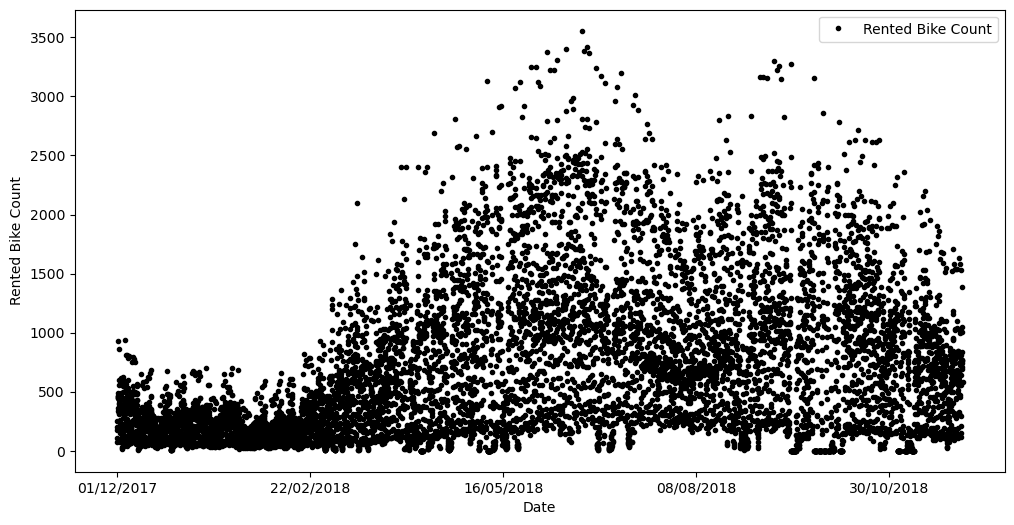

In [3]:
data.plot(x='Date',y='Rented Bike Count',color='k',marker='.',linestyle='none',
          figsize=(12,6),ylabel='Rented Bike Count')
plt.show()

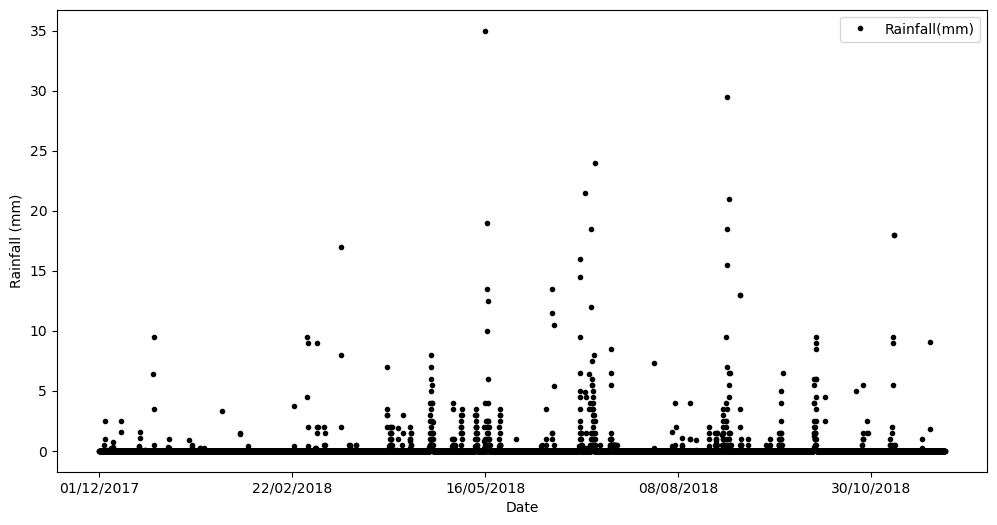

In [4]:
data.plot(x='Date',y='Rainfall(mm)',color='k',marker='.',linestyle='none',
          figsize=(12,6),ylabel='Rainfall (mm)')
plt.show()

Rainfall is a sparse variable

In [5]:
data.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


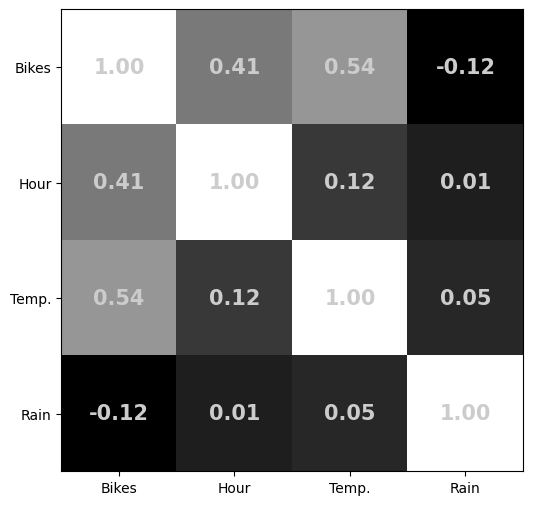

In [6]:
### show the correlation matrix in an image

# only using a few columns
columns2use = ['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)']
colsshort = ['Bikes','Hour','Temp.','Rain'] # for axis labeleing

# re-compute the correlation matrix
R = data[columns2use].corr()

# draw the image
plt.figure(figsize=(6,6))
plt.imshow(R.values,cmap='gray')
plt.xticks(range(4),labels=colsshort)
plt.yticks(range(4),labels=colsshort)

# text labels
for (j,i),num in np.ndenumerate(R.values):
  plt.text(i,j,f'{num:.2f}',color=[.8,.8,.8],ha='center',va='center',fontweight='bold',fontsize=15)

plt.show()

In [7]:
data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,No Holiday,Yes


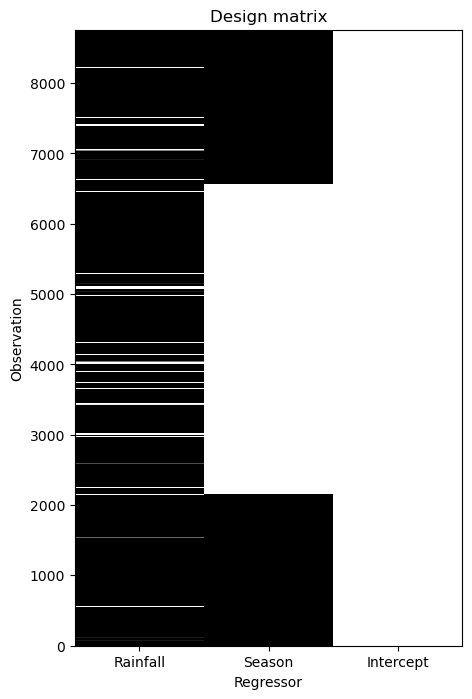

In [8]:
# Create a design matrix
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()

# add an intercept
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)

# extract DV
y = data[['Rented Bike Count']].to_numpy()


# visualize the design matrix
plt.figure(figsize=(5,8))
plt.imshow(desmat,aspect='auto',vmin=0,vmax=1,origin='lower',interpolation='nearest',cmap='gray')
plt.ylabel('Observation')
plt.xlabel('Regressor')
plt.title('Design matrix')
plt.xticks(range(3),labels=['Rainfall','Season','Intercept'])
plt.show()

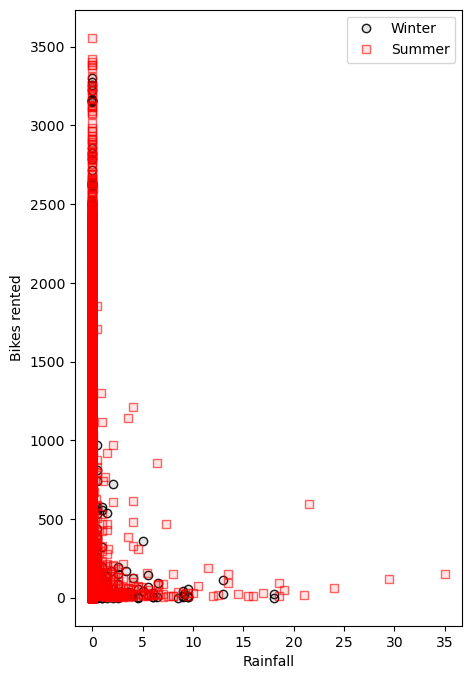

In [9]:
# plot the data
plt.figure(figsize=(5,8))

# separately for autumn/winter and spring/summer
plt.plot(desmat[desmat[:,1]==0,0],y[desmat[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(desmat[desmat[:,1]==1,0],y[desmat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('Rainfall')
plt.ylabel('Bikes rented')
plt.legend()
plt.show()
     

In [10]:
# run the regression
beta = np.linalg.lstsq(desmat,y,rcond=None)
beta[0]

array([[-80.52367456],
       [369.12668112],
       [530.49459615]])

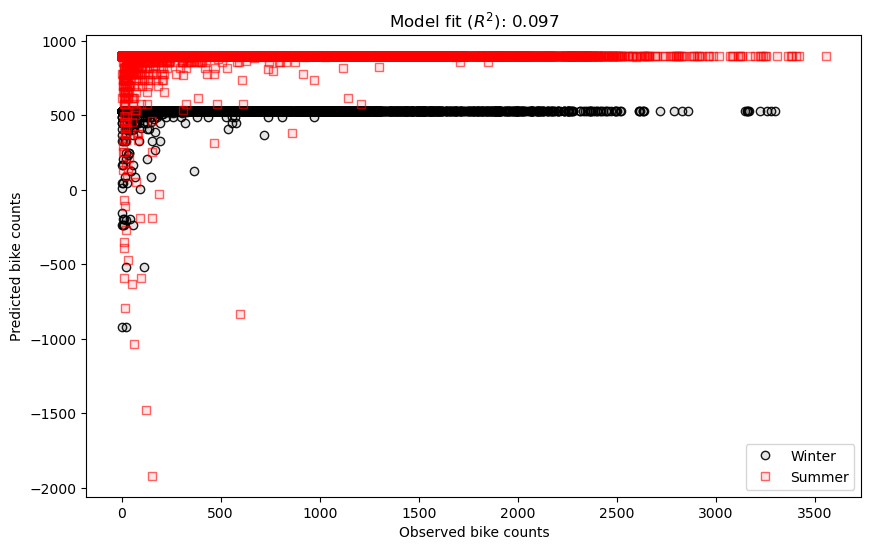

In [11]:
# predicted data
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2


# and plot
plt.figure(figsize=(10,6))
plt.plot(y[desmat[:,1]==0],yHat[desmat[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y[desmat[:,1]==1],yHat[desmat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')
plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit ($R^2$): {modelfit:.3f}')
plt.show()
     

In [12]:
import statsmodels.api as sm

# extract data (staying with pandas dataframes)
desmat_df  = data[['Rainfall(mm)','Seasons']]
obsdata_df = data['Rented Bike Count']

# create and fit the model
desmat_df = sm.add_constant(desmat_df) # must explicitly add an intercept (constant)
model = sm.OLS(obsdata_df,desmat_df).fit()
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     468.8
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          3.80e-194
Time:                        21:22:34   Log-Likelihood:                -68654.
No. Observations:                8760   AIC:                         1.373e+05
Df Residuals:                    8757   BIC:                         1.373e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          530.4946      9.313     56.963   

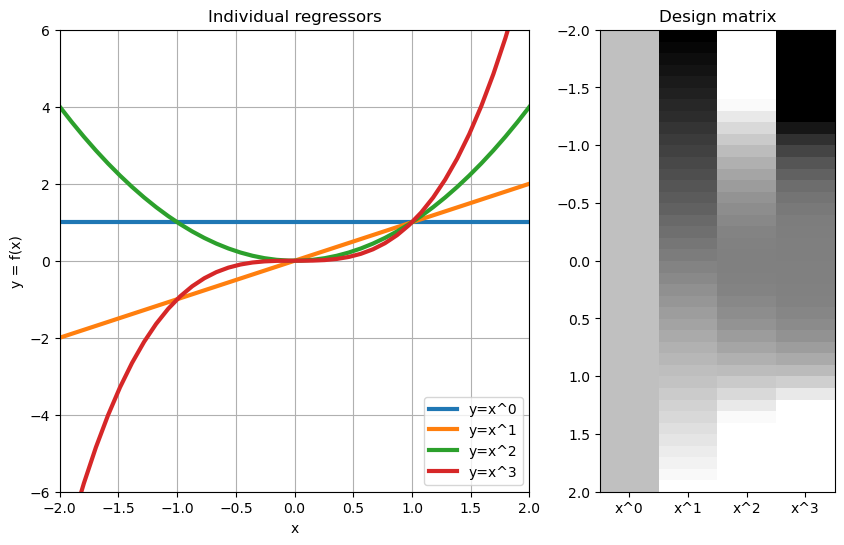

In [15]:
x = np.linspace(-2,2,40)
maxorder = 3
desmat = np.zeros((len(x),maxorder+1))
xlab = []


_,axs = plt.subplots(1,2,gridspec_kw={'width_ratios':[2,1]}, figsize=(10,6))

for i in range(maxorder+1):
    axs[0].plot(x,x**i,linewidth=3,label='y=x^%g'%i)
    desmat[:,i] = x**i
    xlab.append( 'x^%g'%i )

axs[0].set(xlim=[-2,2],xlabel='x')
axs[0].set(ylim=[-6,6],ylabel='y = f(x)')
axs[0].grid()
axs[0].legend()
axs[0].set_title('Individual regressors')

# draw the design matrix
axs[1].imshow(desmat,cmap='gray',aspect='auto',vmin=-2,vmax=2,extent=[-.5,maxorder+.5,x[-1],x[0]])
axs[1].set(xticks=range(maxorder+1),xticklabels=xlab)
axs[1].set_title('Design matrix')

plt.show()

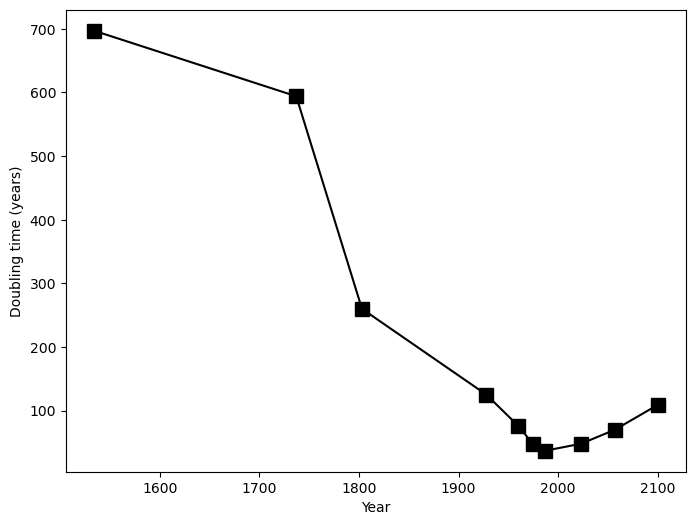

In [16]:
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

N = len(year)


# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10)

plt.xlabel('Year')
plt.ylabel('Doubling time (years)')
plt.savefig('Figure_12_06.png',dpi=300)
plt.show()

## DATA CITATION: 
#    Max Roser, Hannah Ritchie and Esteban Ortiz-Ospina (2013) - "World Population Growth".
#    Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/world-population-growth'
#    https://ourworldindata.org/uploads/2019/12/World-population-doubling-time-1.png

In [17]:
# design matrix for a 3rd-order polynomial
X = np.zeros((N,4))

# build the design matrix (note the range "4" because of indexing 0-3)
for i in range(4): 
  X[:,i] = np.array(year)**i


# converted to ints for your viewing pleasure
print(X.astype(int))

[[         1       1534    2353156 3609741304]
 [         1       1737    3017169 5240822553]
 [         1       1803    3250809 5861208627]
 [         1       1928    3717184 7166730752]
 [         1       1960    3841600 7529536000]
 [         1       1975    3900625 7703734375]
 [         1       1987    3948169 7845011803]
 [         1       2023    4092529 8279186167]
 [         1       2057    4231249 8703679193]
 [         1       2100    4410000 9261000000]]


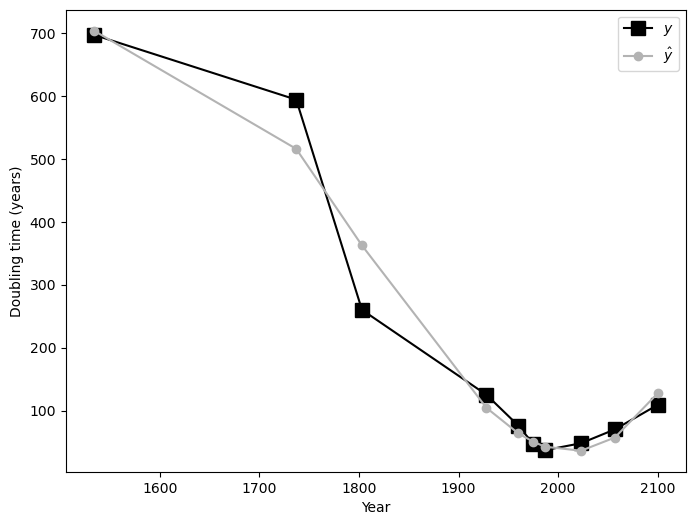

In [20]:
# compute the regression coefficients
beta = np.linalg.lstsq(X,doubleTime, rcond=None)

# and the predicted data
yHat = X@beta[0]

# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10,label=r'$y$')
plt.plot(year,yHat,'o-',color=[.7,.7,.7],label=r'$\hat{y}$')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Doubling time (years)')
plt.show()

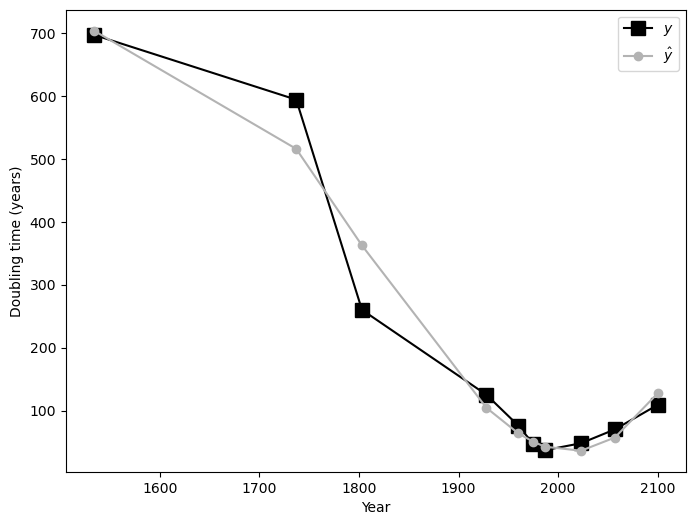

In [21]:
# Now using polyfit

beta = np.polyfit(year,doubleTime,3)
yHat = np.polyval(beta,year)


# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10,label=r'$y$')
plt.plot(year,yHat,'o-',color=[.7,.7,.7],label=r'$\hat{y}$')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Doubling time (years)')
plt.show()

In [22]:
# re-create design matrix and data vector
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)
y = data[['Rented Bike Count']].to_numpy()

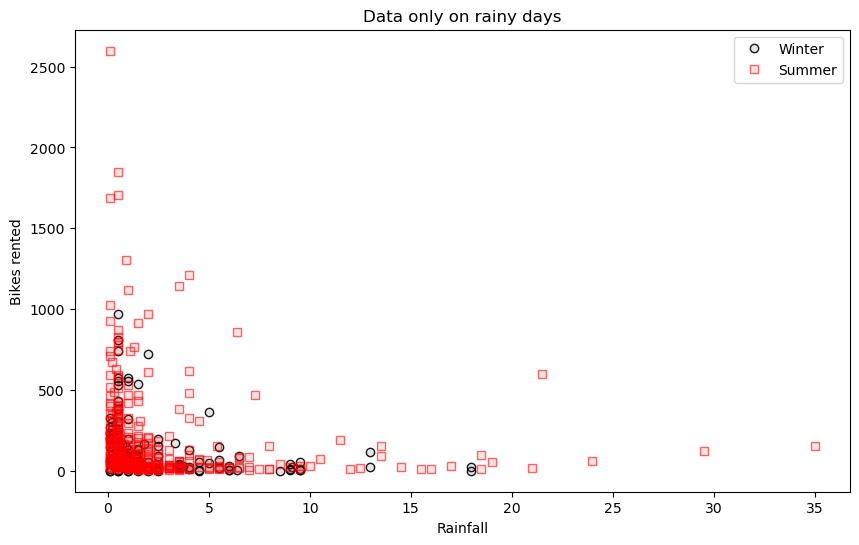

In [23]:
# repeat excluding zeros in rainfall

desmat_norain = desmat[desmat[:,0]>0,:]
y_norain = y[desmat[:,0]>0,:]

# plot the data
plt.figure(figsize=(10,6))

# separately for autumn/winter and spring/summer
plt.plot(desmat_norain[desmat_norain[:,1]==0,0],y_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(desmat_norain[desmat_norain[:,1]==1,0],y_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('Rainfall')
plt.ylabel('Bikes rented')
plt.title('Data only on rainy days')
plt.legend()
plt.show()

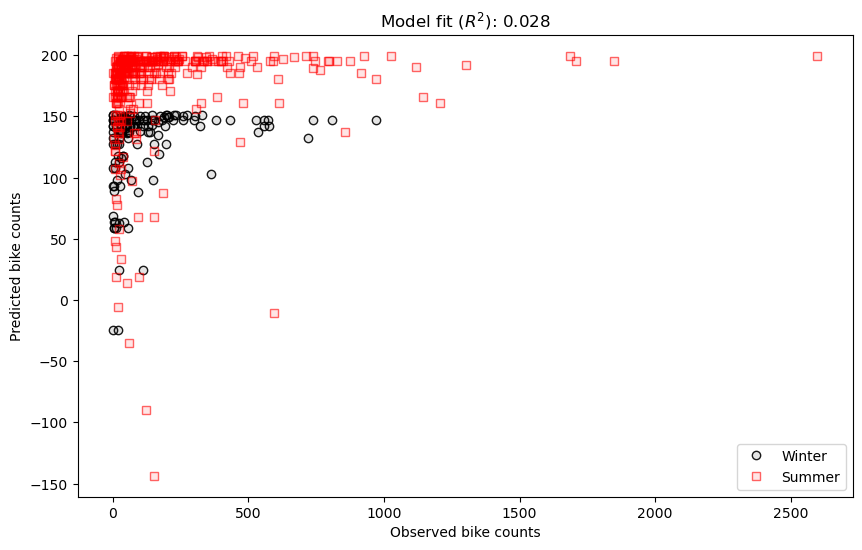

In [24]:
# run the regression (using np's least-squares)
beta_norain = np.linalg.lstsq(desmat_norain,y_norain,rcond=None)


# predicted data
yHat_norain = desmat_norain @ beta_norain[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y_norain.T,yHat_norain.T)[0,1]**2



## plot some results.
plt.figure(figsize=(10,6))
plt.plot(y_norain[desmat_norain[:,1]==0],yHat_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y_norain[desmat_norain[:,1]==1],yHat_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit ($R^2$): {modelfit:.3f}')
plt.show()

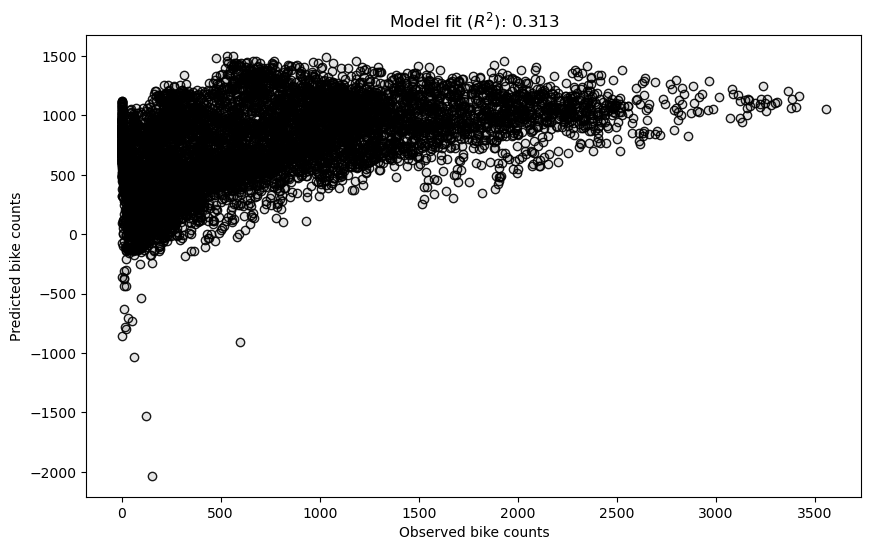

In [25]:
# Create a design matrix
desmat = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)


beta = np.linalg.lstsq(desmat,y,rcond=None)
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2

# and plot
plt.figure(figsize=(10,6))
plt.plot(y,yHat,'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9))
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit ($R^2$): {modelfit:.3f}')
plt.savefig('Figure_12_09.png',dpi=300)
plt.show()

In [26]:
# some random linear combination
lincombo = 4*desmat[:,0] + .4*desmat[:,1]

# Create a design matrix
desmatM = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmatM = np.append(desmatM,np.ones((desmatM.shape[0],1)),axis=1)

# augmented design matrix
desmatM = np.append(desmatM,lincombo.reshape(-1,1),axis=1)

# size and rank of the design matrix
print(f'Design matrix size: {desmatM.shape}')
print(f'Design matrix rank: {np.linalg.matrix_rank(desmatM)}')

# correlation matrix (note: nan's for intercept b/c no variance)
oSettings = np.seterr() # default error handling
np.seterr(all='ignore') # ignore warnings for correlation matrices
print(f'\nDesign matrix correlation matrix:')
print(np.round(np.corrcoef(desmatM.T),5))
np.seterr(**oSettings); # reset the error handling

Design matrix size: (8760, 4)
Design matrix rank: 3

Design matrix correlation matrix:
[[1.      0.05028     nan 0.7057 ]
 [0.05028 1.          nan 0.74309]
 [    nan     nan     nan     nan]
 [0.7057  0.74309     nan 1.     ]]


In [27]:
# A nicer way to print out the correlation matrix using pandas
pd.DataFrame(desmatM,columns=['Rain','Temp','Int','Combo']).corr()

,Rain,Temp,Int,Combo
Rain,1.000000,0.050282,NaN,0.705704
Temp,0.050282,1.000000,NaN,0.743094
Int,NaN,NaN,NaN,NaN
Combo,0.705704,0.743094,NaN,1.000000


In [28]:
### using left-inverse

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(desmatM.T@desmatM) @ desmatM.T
# FYI, numpy knowingly "inverts" a singular matrix if it's within precision: https://github.com/numpy/numpy/issues/2074

# solve for the coefficients and compute R^2
beta1 = X_leftinv @ y
yHat  = desmatM@beta1

# model fit to data (R^2)
modelfit1 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit1)

0.10306927861230561


In [29]:
### using numpy's least-squares

# fit the model
beta2 = np.linalg.lstsq(desmatM,y,rcond=None)
yHat  = desmatM@beta2[0]

# model fit to data (R^2)
modelfit2 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit2)

0.3126481542486901


In [30]:
### using statsmodels

# convert the design matrix into a pandas dataframe
desmat_df = pd.DataFrame(desmatM)

# create and fit the model
desmat_df = sm.add_constant(desmat_df)
model = sm.OLS(obsdata_df,desmat_df).fit()


beta3 = model.params.values
modelfit3 = model.rsquared

In [31]:
# print all to compare

print('MODEL FIT TO DATA:')
print(f'  Left-inverse: {modelfit1:.4f}')
print(f'  np lstsqr   : {modelfit2:.4f}')
print(f'  statsmodels : {modelfit3:.4f}')

print(' ')
print('BETA COEFFICIENTS:')
print(f'  Left-inverse: {np.round(beta1.T,3)}')
print(f'  np lstsqr   : {np.round(beta2[0].T,3)}')
print(f'  statsmodels : {np.round(beta3.T,3)}')

MODEL FIT TO DATA:
  Left-inverse: 0.1031
  np lstsqr   : 0.3126
  statsmodels : 0.3126
 
BETA COEFFICIENTS:
  Left-inverse: [[-1.67070e+03 -1.12200e+00  3.37483e+02  1.17151e+02]]
  np lstsqr   : [[ -8.567  37.239 337.483 -19.374]]
  statsmodels : [ -8.567  37.239 337.483 -19.374]


In [32]:
# regularization proportion
gamma = .01

# gamma times the norm
gamnorm = gamma * np.linalg.norm(desmatM,'fro')**2

# inverse of (X'X+lI)
leftinv = np.linalg.inv(desmatM.T@desmatM + gamnorm*np.eye(desmatM.shape[1]))

# print results
print(f"inv(X'X + {gamma}*I) size: {leftinv.shape}")
print(f"inv(X'X + {gamma}*I) rank: {np.linalg.matrix_rank(leftinv)}")

inv(X'X + 0.01*I) size: (4, 4)
inv(X'X + 0.01*I) rank: 4


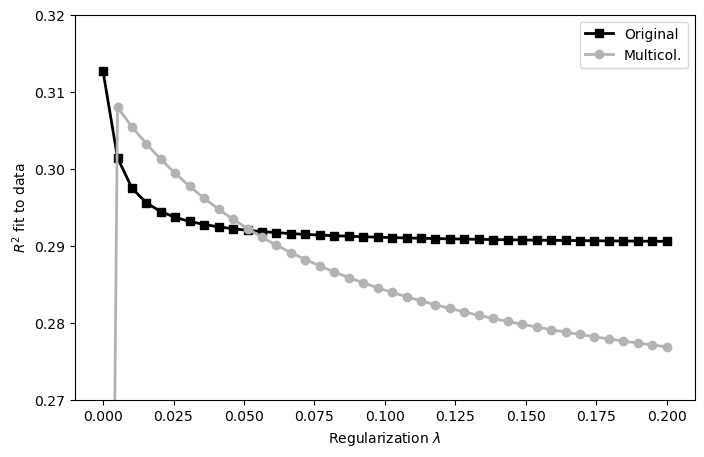

In [33]:
### Note about this code:
# Exercise 7 of chapter 13 relies on this code. Use the following toggle when you're on chapter 13 :)
I_am_reading_chapter_13 = False


# range of gamma parameters
gs = np.linspace(0,.2,40)

# initialize r2 vector
r2s  = np.zeros(gs.shape)
r2sM = np.zeros(gs.shape) # the 'M' is for multicollinearity


# loop over gammas
for i in range(len(gs)):

  # create lambda
  l = gs[i]*np.linalg.norm(desmat,'fro')**2

  if I_am_reading_chapter_13: # exercise 13.7
    l = gs[i]*np.mean(np.linalg.eig(desmat.T@desmat)[0])

  # compute left-inverse
  leftinv = np.linalg.inv(desmat.T@desmat + l*np.eye(desmat.shape[1])) @ desmat.T
  
  # compute beta and predicted data
  b = leftinv @ y
  yHat = desmat@b

  # model fit to data
  r2s[i] = np.corrcoef(y.T,yHat.T)[0,1]**2


  ### repeat for the multicollinear model (condensed for convenience)
  l       = gs[i]*np.linalg.norm(desmatM,'fro')**2
  if I_am_reading_chapter_13: # exercise 13.6
    l     = gs[i]*np.mean(np.linalg.eig(desmatM.T@desmatM)[0])
  leftinv = np.linalg.inv(desmatM.T@desmatM + l*np.eye(desmatM.shape[1])) @ desmatM.T
  b       = leftinv @ y
  yHat    = desmatM@b
  r2sM[i] = np.corrcoef(y.T,yHat.T)[0,1]**2



# plot the results
plt.figure(figsize=(8,5))
plt.plot(gs,r2s,'ks-',linewidth=2,label='Original')
plt.plot(gs,r2sM,'o-',linewidth=2,label='Multicol.',color=[.7,.7,.7])
plt.xlabel('Regularization $\lambda$')
plt.ylabel('$R^2$ fit to data')
plt.ylim([.27,.32])
plt.legend()
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


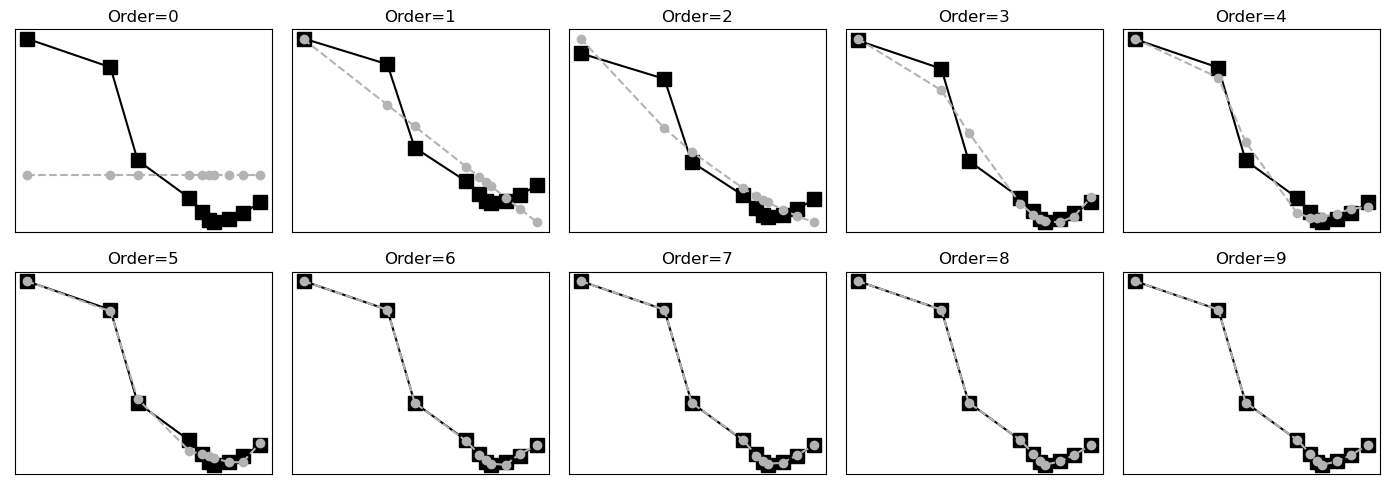

In [34]:
# plot it
_,axs = plt.subplots(2,5,figsize=(14,5))
axs = axs.flatten()


for oi in range(N):
  beta = np.polyfit(year,doubleTime,oi)
  yHat = np.polyval(beta,year)

  # plot
  axs[oi].plot(year,doubleTime,'ks-',markersize=10)
  axs[oi].plot(year,yHat,'o--',color=[.7,.7,.7])
  axs[oi].set(xticks=[], yticks=[])
  axs[oi].set_title('Order=%g' %oi)

plt.tight_layout()
plt.savefig('Figure_12_11.png',dpi=300)
plt.show()

In [35]:
# NOTE: data and model from the previous chapter
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

# design matrix
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
beta = np.linalg.lstsq(X,happiness,rcond=None)[0]

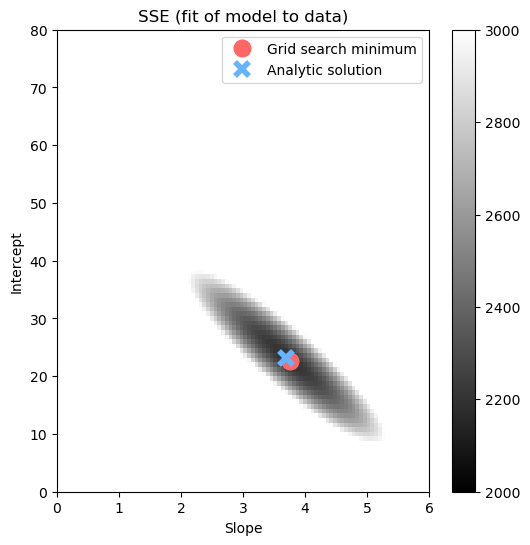

Analytic result: 
   Intercept: 23.13, slope: 3.70
 
Empirical result: 
   Intercept: 22.63, slope: 3.76


In [36]:
# the number of steps for each parameter
gridResolution = 100


# specify intercepts and slopes to test
intercepts = np.linspace(0,80,gridResolution)
slopes = np.linspace(0,6,gridResolution)

# initialize output matrix
SSEs = np.zeros((len(intercepts),len(slopes)))


# for-loops over parameters
for inti in range(len(intercepts)):
  for slopei in range(len(slopes)):

    # model-predicted data
    yHat = X @ np.array([intercepts[inti],slopes[slopei]]).T

    # sum of squared errors
    SSEs[inti,slopei] = np.sum((yHat-happiness)**2)


# find empirical minimum
i,j = np.unravel_index( np.argmin(SSEs),SSEs.shape )
empIntercept,empSlope = intercepts[i], slopes[j]


# plot the error landscape with empirical minimum
plt.figure(figsize=(6,6))
plt.imshow(SSEs,vmin=2000,vmax=3000,
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto',cmap='gray')
plt.plot(empSlope,empIntercept,'o',color=[1,.4,.4],markersize=12,label='Grid search minimum')
plt.plot(beta[1],beta[0],'x',color=[.4,.7,1],markeredgewidth=4,markersize=10,label='Analytic solution')
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('SSE (fit of model to data)')
plt.legend()
plt.savefig('Figure_12_08.png',dpi=300)
plt.show()

# print out the results
print('Analytic result: ')
print(f'   Intercept: {beta[0]:.2f}, slope: {beta[1]:.2f}')
print(' ')
print('Empirical result: ')
print(f'   Intercept: {empIntercept:.2f}, slope: {empSlope:.2f}')

/usr/local/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


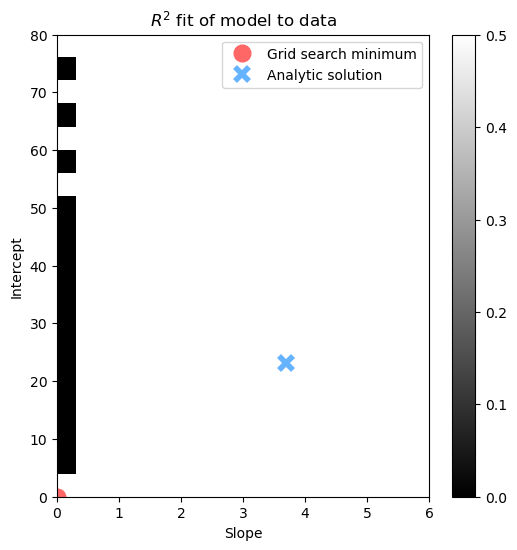

Analytic result: 
   Intercept: 23.13, slope: 3.70
 
Empirical result: 
   Intercept: 0.00, slope: 0.00


In [37]:
# the number of steps for each parameter
gridResolution = 20


# specify intercepts and slopes to test
intercepts = np.linspace(0,80,gridResolution)
slopes = np.linspace(0,6,gridResolution)

# initialize output matrix
r2 = np.zeros((len(intercepts),len(slopes)))
allYhat = np.zeros((len(intercepts),len(slopes),len(happiness)))

# for-loops over parameters
for inti in range(len(intercepts)):
  for slopei in range(len(slopes)):

    # model-predicted data
    yHat = X @ np.array([intercepts[inti],slopes[slopei]]).T

    # R2 model fit
    r2[inti,slopei] = np.corrcoef(yHat,happiness)[0,1]**2
    
    # store all predicted data values
    allYhat[inti,slopei,:] = yHat


# find empirical minimum
i,j = np.unravel_index( np.argmax(r2),r2.shape )
empIntercept,empSlope = intercepts[i], slopes[j]


# plot the error landscape with empirical minimum
plt.figure(figsize=(6,6))
plt.imshow(r2,vmin=0,vmax=.5,
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto',cmap='gray')
plt.plot(empSlope,empIntercept,'o',color=[1,.4,.4],markersize=12,label='Grid search minimum')
plt.plot(beta[1],beta[0],'x',color=[.4,.7,1],markeredgewidth=4,markersize=10,label='Analytic solution')
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('$R^2$ fit of model to data')
plt.legend()
plt.show()

# print out the results
print('Analytic result: ')
print(f'   Intercept: {beta[0]:.2f}, slope: {beta[1]:.2f}')
print(' ')
print('Empirical result: ')
print(f'   Intercept: {empIntercept:.2f}, slope: {empSlope:.2f}')

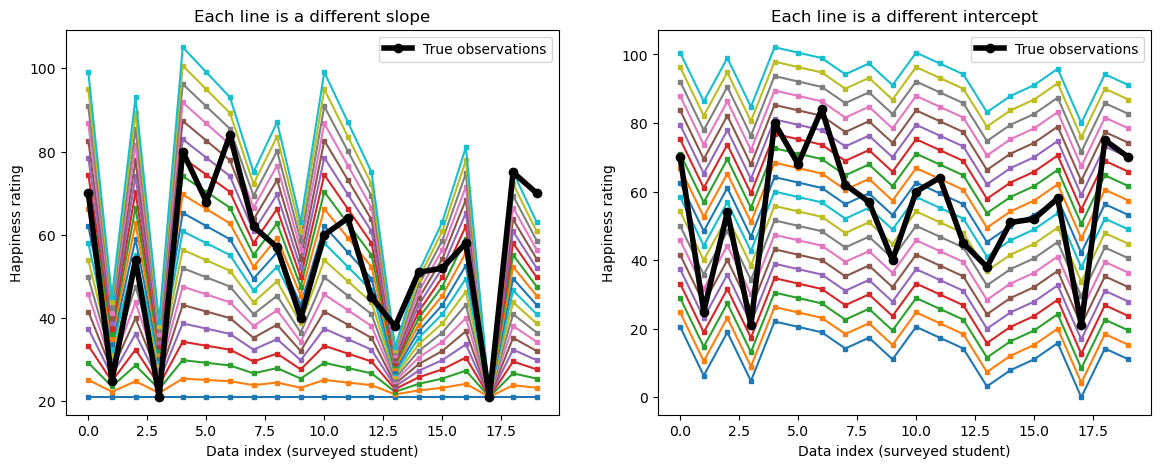

In [38]:
# Why doesn't this approach work? 
# Let's start by plotting predicted data for different parameters.

_,axs = plt.subplots(1,2,figsize=(14,5))

axs[0].plot(allYhat[5,:,:].T,'s-',markersize=3)
axs[0].plot(happiness,'ko-',linewidth=4,label='True observations')
axs[0].set_xlabel('Data index (surveyed student)')
axs[0].set_ylabel('Happiness rating')
axs[0].set_title('Each line is a different slope')
axs[0].legend()

axs[1].plot(allYhat[:,5,:].T,'s-',markersize=3)
axs[1].plot(happiness,'ko-',linewidth=4,label='True observations')
axs[1].set_xlabel('Data index (surveyed student)')
axs[1].set_ylabel('Happiness rating')
axs[1].set_title('Each line is a different intercept')
axs[1].legend()

plt.show()

# The plots show that the predicted values are quite similar for different parameter pairs.
# Recall that data are mean-centered in the correlation formula. In fact, we can re-plot these
# predicted data after mean-centering, i.e., the way a correlation would see the data. 
# Move on to the next cell...

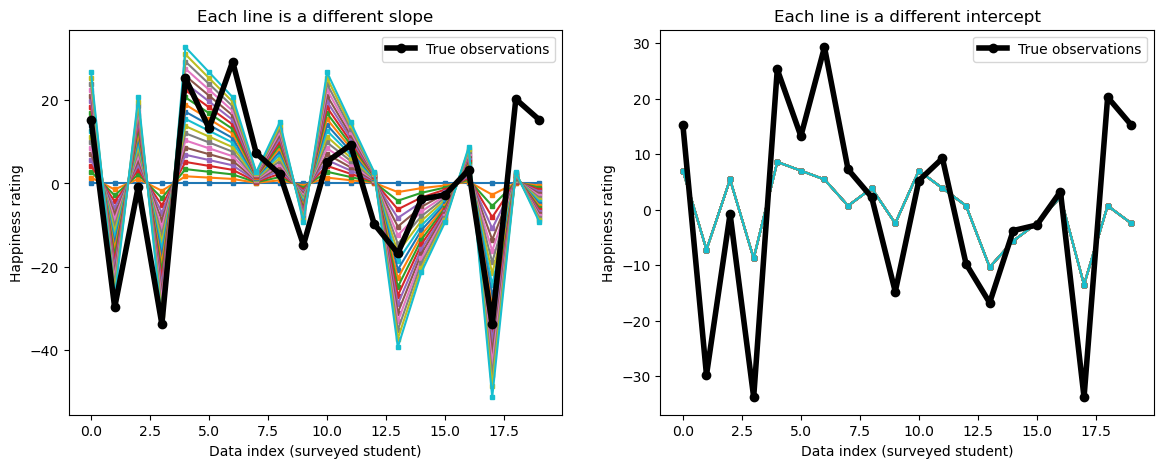

In [39]:
# The plots here are the same as above, but all data have been mean-centered.

_,axs = plt.subplots(1,2,figsize=(14,5))

axs[0].plot(allYhat[5,:,:].T - np.mean(allYhat[5,:,:].T,axis=0),'s-',markersize=3)
axs[0].plot(happiness-np.mean(happiness),'ko-',linewidth=4,label='True observations')
axs[0].set_xlabel('Data index (surveyed student)')
axs[0].set_ylabel('Happiness rating')
axs[0].set_title('Each line is a different slope')
axs[0].legend()

axs[1].plot(allYhat[:,5,:].T - np.mean(allYhat[:,5,:].T,axis=0),'s-',markersize=3)
axs[1].plot(happiness-np.mean(happiness),'ko-',linewidth=4,label='True observations')
axs[1].set_xlabel('Data index (surveyed student)')
axs[1].set_ylabel('Happiness rating')
axs[1].set_title('Each line is a different intercept')
axs[1].legend()

plt.show()

# All of the intercept terms have collapsed into a single line -- not surprising considering that
# the intercept term of a linear model _is_ simply a mean offset.
# 
# The conclusion of this investigation is that R^2 is not a useful model fit metric in this example.
# Of course, that doesn't mean it never a useful model; instead, it means that you need to think
# carefully about the metrics you use to evaluate model fit to data.